In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rand = default_rng().random

[]

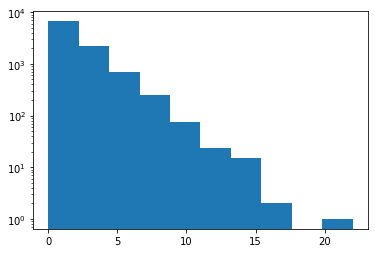

In [28]:
beta = 0.5
N = 10**4
u = rand(N)
y = -np.log(u) # exponential distribution
t = y/beta

# Total elapsed time
time = t.cumsum()

#plt.vlines(T,0,1)

plt.hist(t,bins=10)
plt.semilogy()



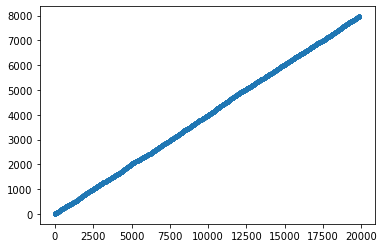

In [29]:
# Probability of a step to the right
xi = 0.9

steps = 2*(rand(N) < xi) - 1
location = steps.cumsum()

plt.plot(time, location, '.')

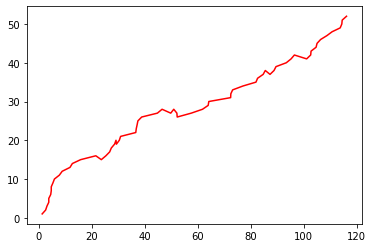

In [31]:
# cut off simulation after 2 minutes by slicing the arrays
cutoff = 120

plt.plot(time[time<cutoff], location[time<cutoff], 'r-')

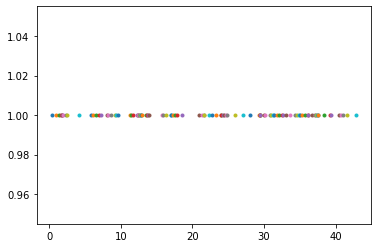

In [36]:
# Gillespie Algorithm

l0 = 0
beta_birth = 1
k_death = 0.3

N = 100

l = l0
T = 0

for n in range(N):
    rate = beta_birth + k_death + l
    t = - 1/rate * np.log(rand())
    xi = beta_birth / rate
    event = rand() < xi
    if event: 
        l = l + 1
    else:
        l = l - 1
    T = T + t
    plt.plot(T,1,'.')
    